In [1]:
import pandas as pd
import numpy as np
from pandas import plotting

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
plt.style.use('fivethirtyeight')

In [4]:
import plotly.offline as py
from plotly.offline import init_notebook_mode,iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected=True)
import plotly.figure_factory as ff
import os

In [5]:
data=pd.read_csv(r'C:\Users\Sammed\Downloads\Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
desc=ff.create_table(data.describe())
py.iplot(desc)

In [8]:
data.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

<function matplotlib.pyplot.show(*args, **kw)>

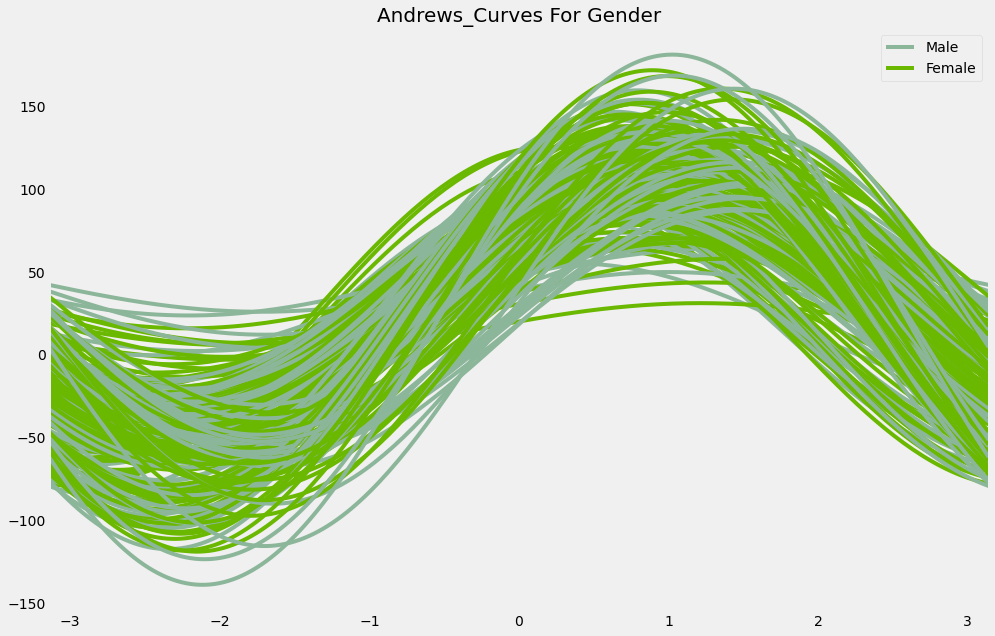

In [9]:
plt.rcParams['figure.figsize']=(15,10)
plotting.andrews_curves(data.drop('CustomerID',axis=1),'Gender')
plt.title('Andrews_Curves For Gender',fontsize=20)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

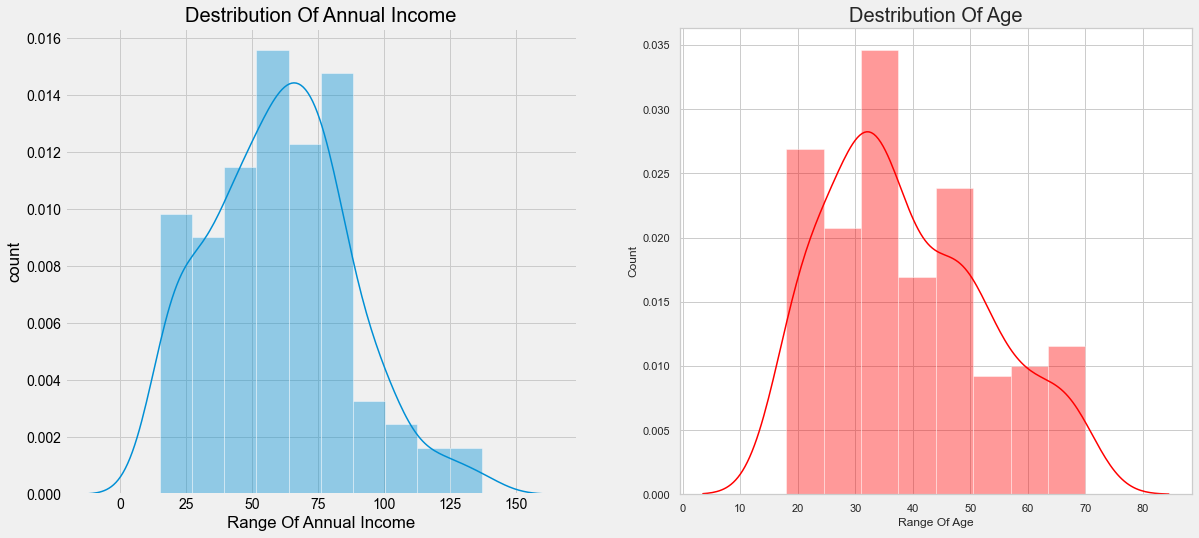

In [10]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize']=(18,8)

plt.subplot(1,2,1)
sns.set(style='whitegrid')
sns.distplot(data['Annual Income (k$)'])
plt.title('Destribution Of Annual Income',fontsize=20)
plt.xlabel('Range Of Annual Income')
plt.ylabel('count')
plt.show

plt.subplot(1,2,2)
sns.set(style='whitegrid')
sns.distplot(data['Age'],color='red')
plt.title('Destribution Of Age',fontsize=20)
plt.xlabel('Range Of Age')
plt.ylabel('Count')
plt.show

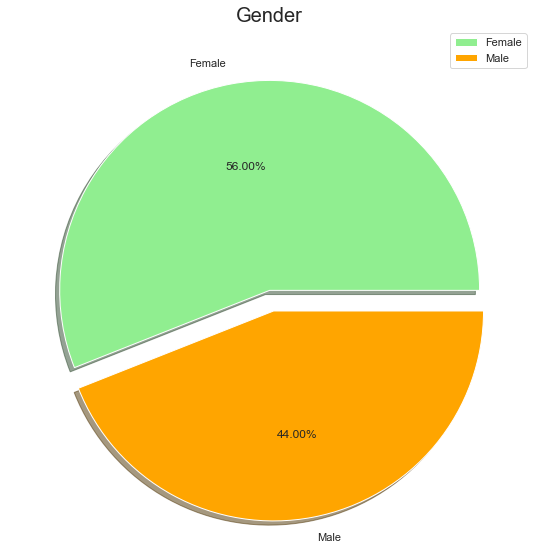

In [11]:
labels=['Female','Male']
size=data['Gender'].value_counts()
colors=['lightgreen','orange']
explode=[0,0.1]

plt.rcParams['figure.figsize']=(9,9)
plt.pie(size,colors=colors,explode=explode,labels=labels,shadow=True,autopct='%.2f%%')
plt.title('Gender',fontsize=20)
plt.axis('off')
plt.legend()
plt.show()

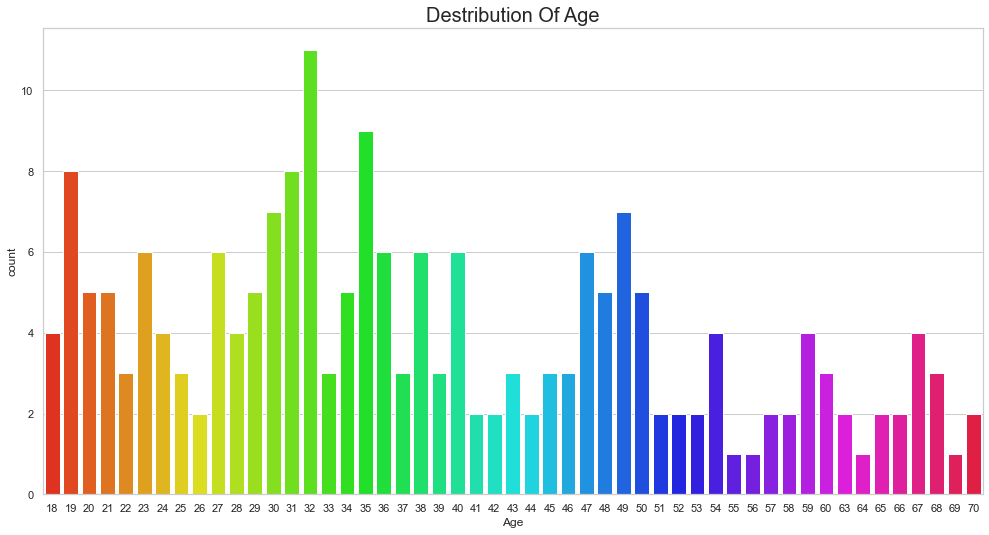

In [12]:
plt.rcParams['figure.figsize']=(15,8)
sns.countplot(data['Age'],palette='hsv')
plt.title('Destribution Of Age',fontsize=20)
plt.show()

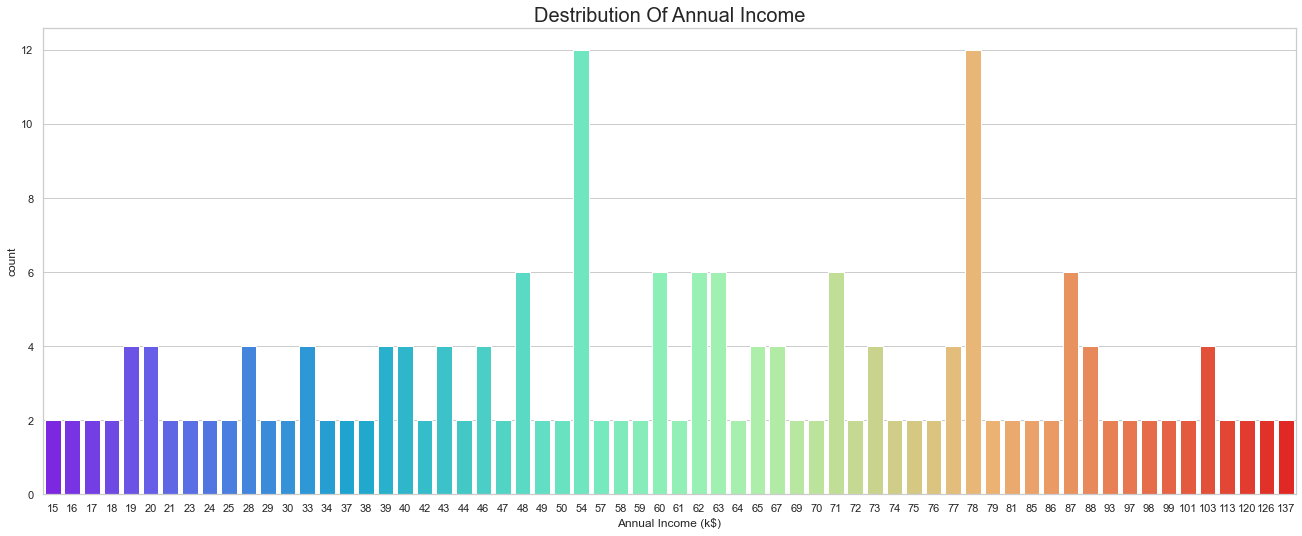

In [13]:
plt.rcParams['figure.figsize']=(20,8)
sns.countplot(data['Annual Income (k$)'],palette='rainbow')
plt.title('Destribution Of Annual Income',fontsize=20)
plt.show()

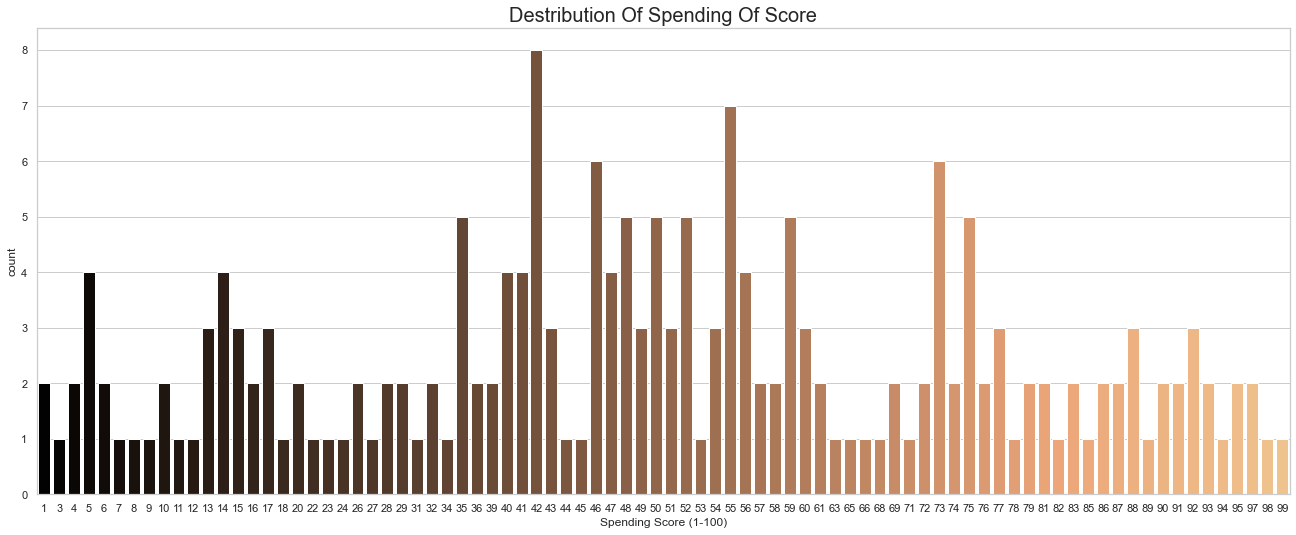

In [14]:
plt.rcParams['figure.figsize']=(20,8)
sns.countplot(data['Spending Score (1-100)'],palette='copper')
plt.title('Destribution Of Spending Of Score',fontsize=20)
plt.show()

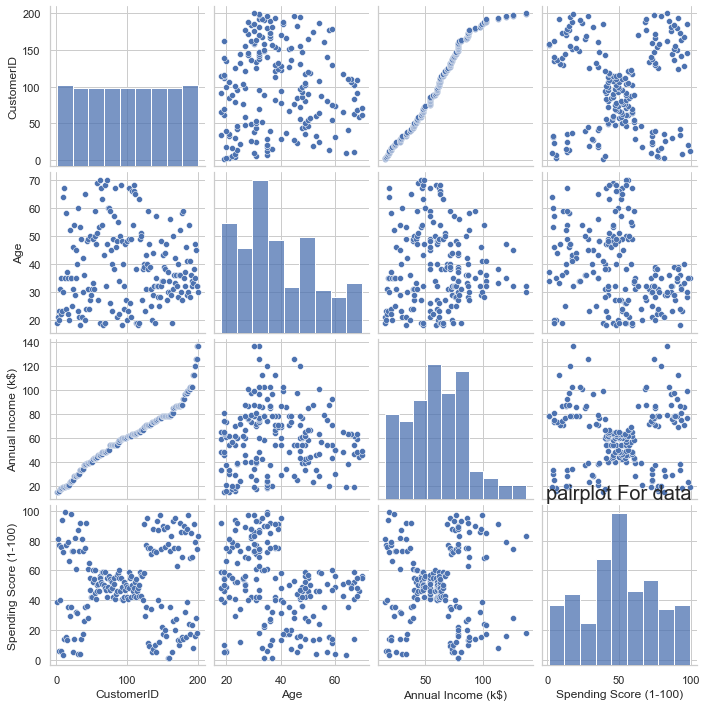

In [15]:
sns.pairplot(data)
plt.title('pairplot For data',fontsize=20)
plt.show()

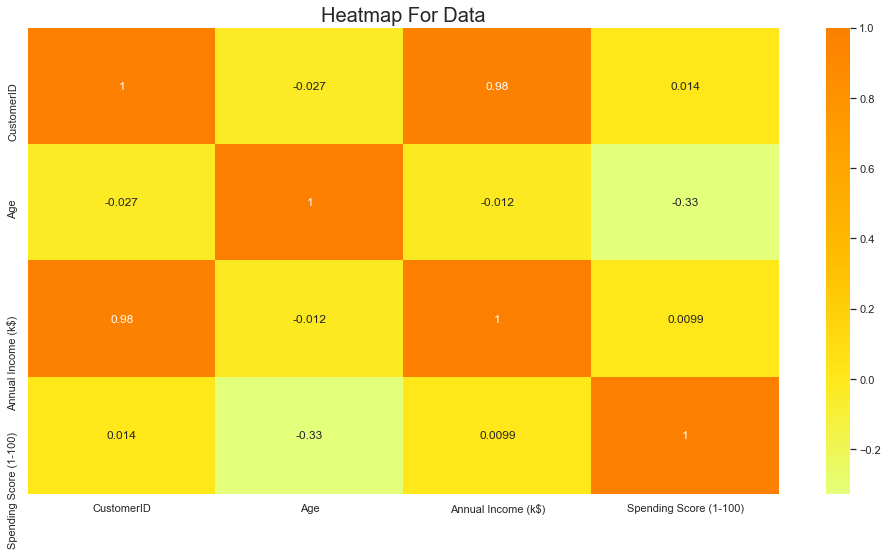

In [16]:
plt.rcParams['figure.figsize']=(15,8)
sns.heatmap(data.corr(),cmap='Wistia',annot=True)
plt.title('Heatmap For Data',fontsize=20)
plt.show()

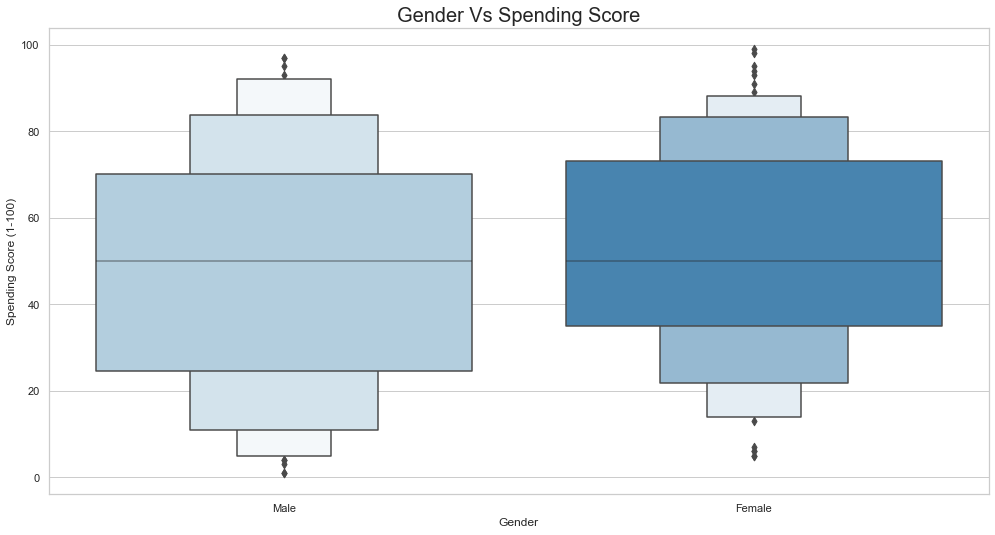

In [17]:
plt.rcParams['figure.figsize']=(15,8)
sns.boxenplot(data['Gender'],data['Spending Score (1-100)'],palette='Blues')
plt.title('Gender Vs Spending Score',fontsize=20)
plt.show()

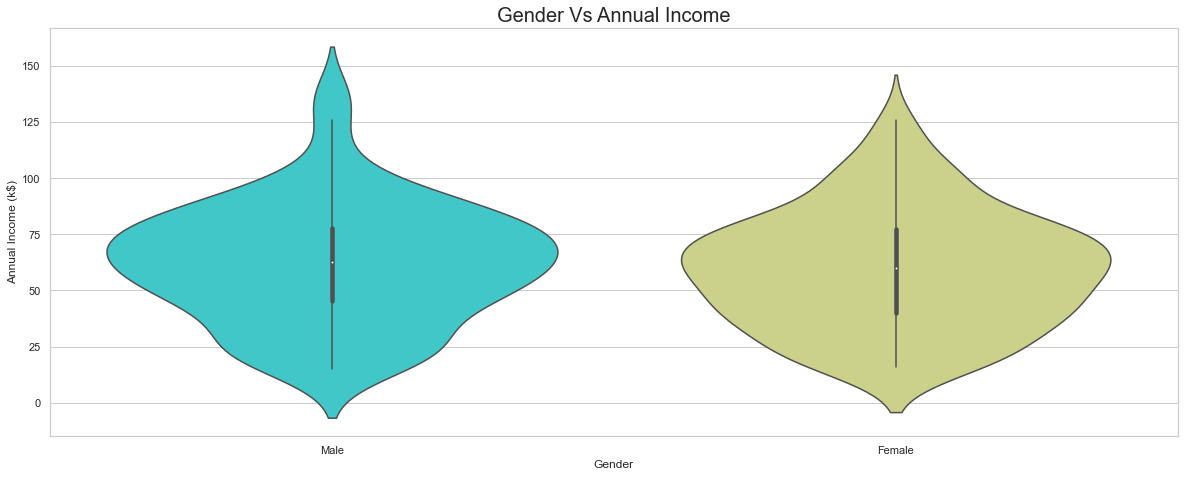

In [18]:
plt.rcParams['figure.figsize']=(18,7)
sns.violinplot(data['Gender'],data['Annual Income (k$)'],palette='rainbow')
plt.title('Gender Vs Annual Income',fontsize=20)
plt.show()

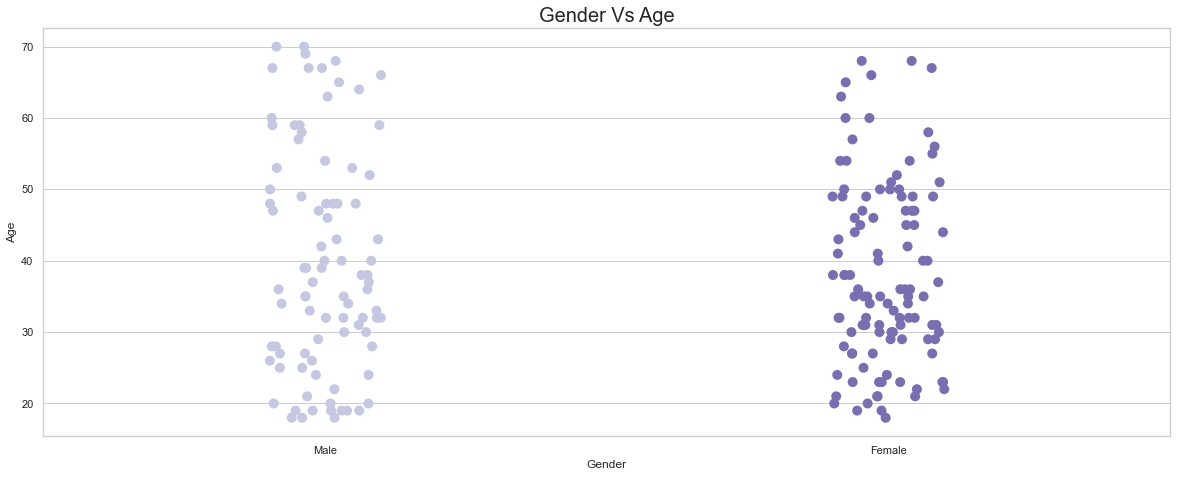

In [19]:
plt.rcParams['figure.figsize']=(18,7)
sns.stripplot(data['Gender'],data['Age'],palette='Purples',size=10)
plt.title('Gender Vs Age',fontsize=20)
plt.show()

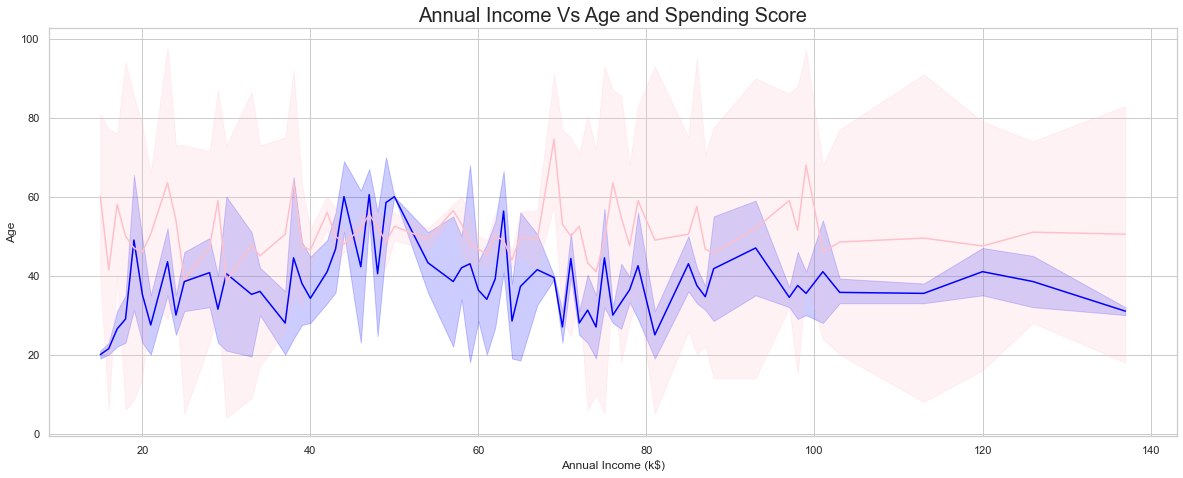

In [20]:
x=data['Annual Income (k$)']
y=data['Age']
z=data['Spending Score (1-100)']

sns.lineplot(x,y,color='blue')
sns.lineplot(x,z,color='pink')
plt.title('Annual Income Vs Age and Spending Score',fontsize=20)
plt.show()

In [21]:
x=data.iloc[:,[3,4]].values
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [22]:
print(x.shape)

(200, 2)


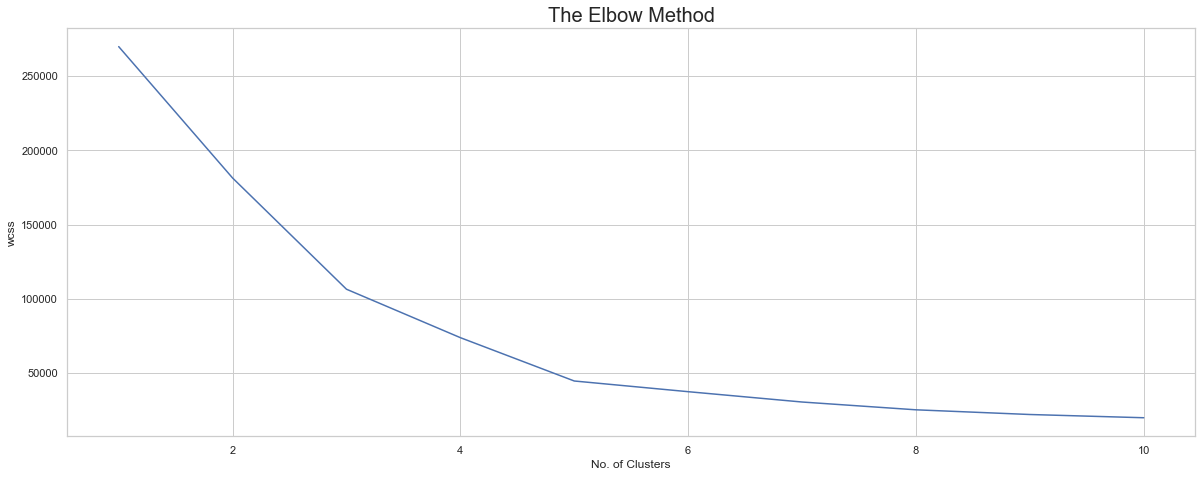

In [23]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

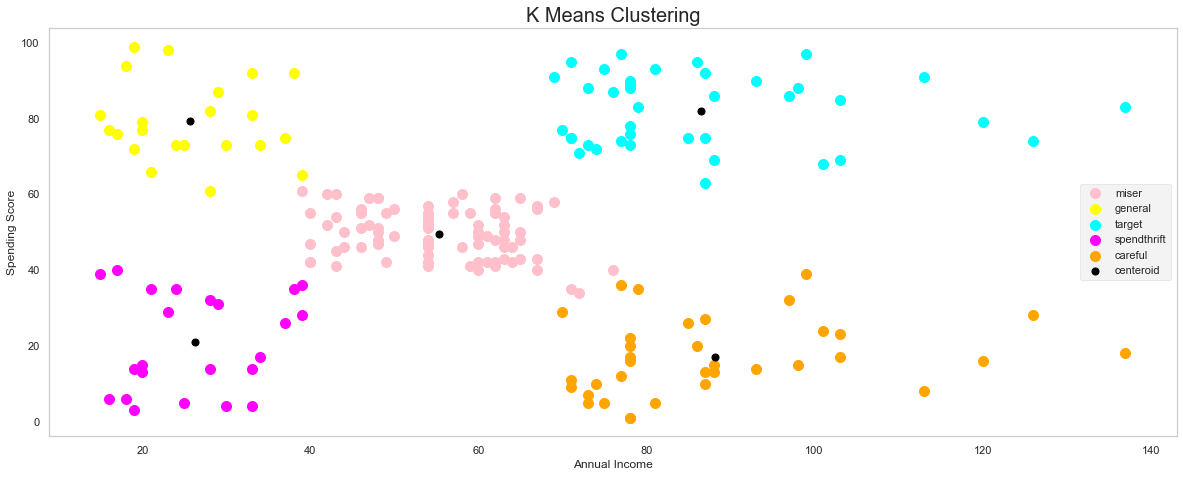

In [24]:
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'miser')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'general')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan', label = 'target')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 100, c = 'magenta', label = 'spendthrift')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 100, c = 'orange', label = 'careful')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'black' , label = 'centeroid')

plt.style.use('fivethirtyeight')
plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

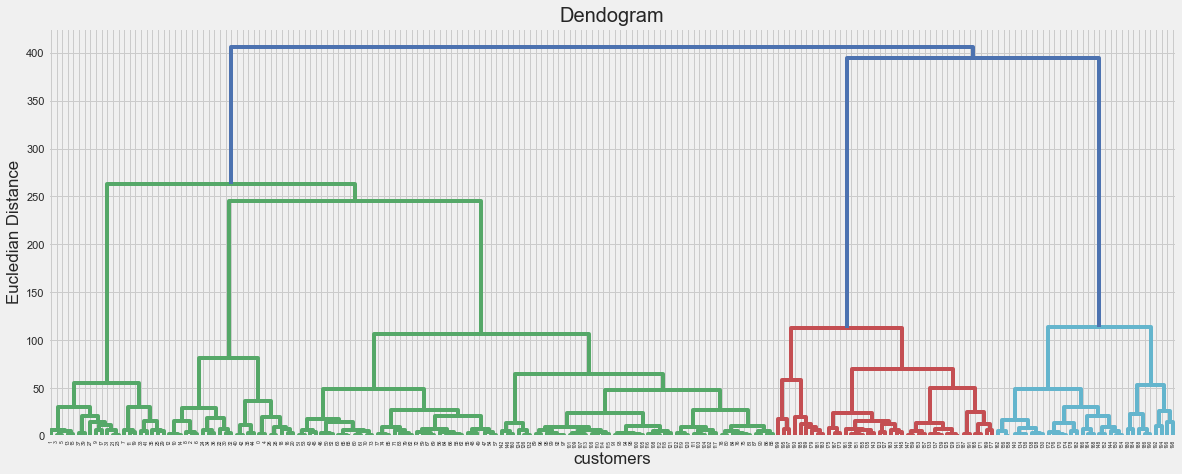

In [25]:
import scipy.cluster.hierarchy as sch


dendrogram=sch.dendrogram(sch.linkage(x,method='ward'))
plt.title('Dendogram',fontsize=20)
plt.xlabel('customers')
plt.ylabel('Eucledian Distance')
plt.show()

In [26]:
from sklearn.cluster import AgglomerativeClustering

hc=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
y_hc=hc.fit_predict(x)
y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

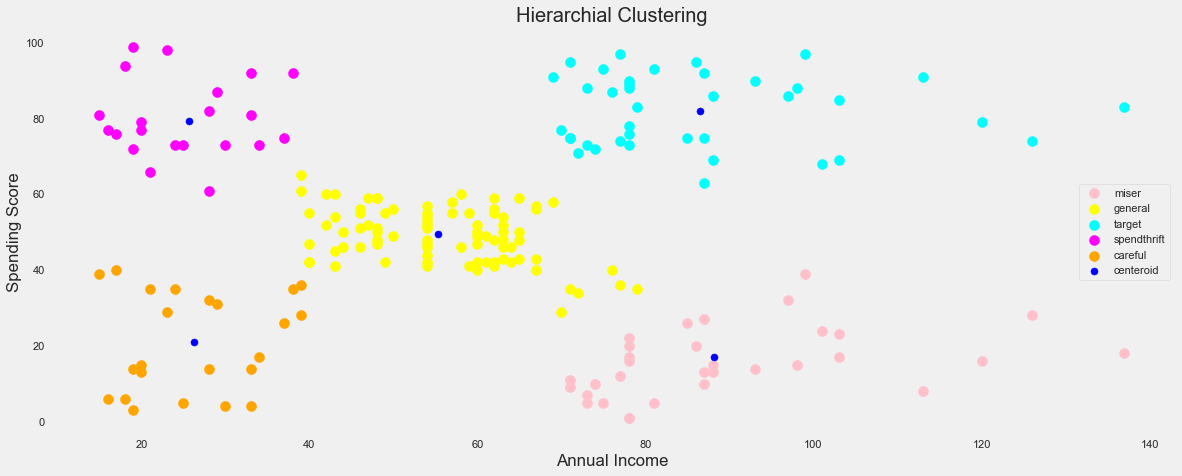

In [27]:
plt.scatter(x[y_hc == 0, 0], x[y_hc == 0, 1], s = 100, c = 'pink', label = 'miser')
plt.scatter(x[y_hc == 1, 0], x[y_hc == 1, 1], s = 100, c = 'yellow', label = 'general')
plt.scatter(x[y_hc == 2, 0], x[y_hc == 2, 1], s = 100, c = 'cyan', label = 'target')
plt.scatter(x[y_hc == 3, 0], x[y_hc == 3, 1], s = 100, c = 'magenta', label = 'spendthrift')
plt.scatter(x[y_hc == 4, 0], x[y_hc == 4, 1], s = 100, c = 'orange', label = 'careful')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.style.use('fivethirtyeight')
plt.title('Hierarchial Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

In [30]:
x=data.iloc[:,[2,4]].values
x.shape

(200, 2)

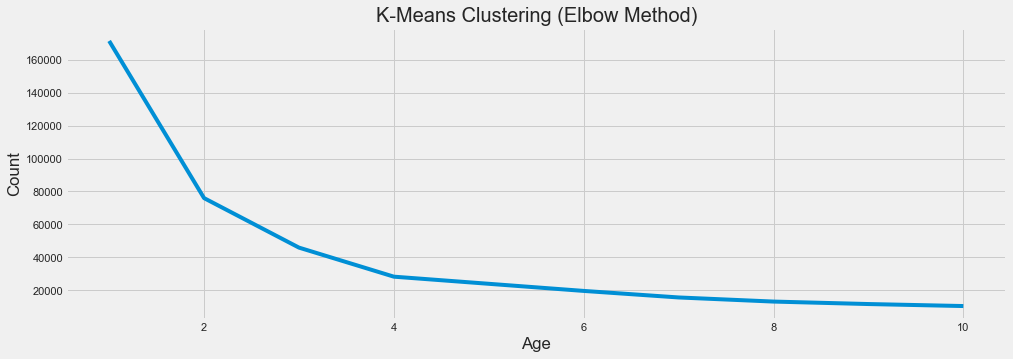

In [32]:
from sklearn.cluster import KMeans


wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
plt.rcParams['figure.figsize']=(15,5)
plt.plot(range(1,11),wcss)
plt.title('K-Means Clustering (Elbow Method)',fontsize=20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

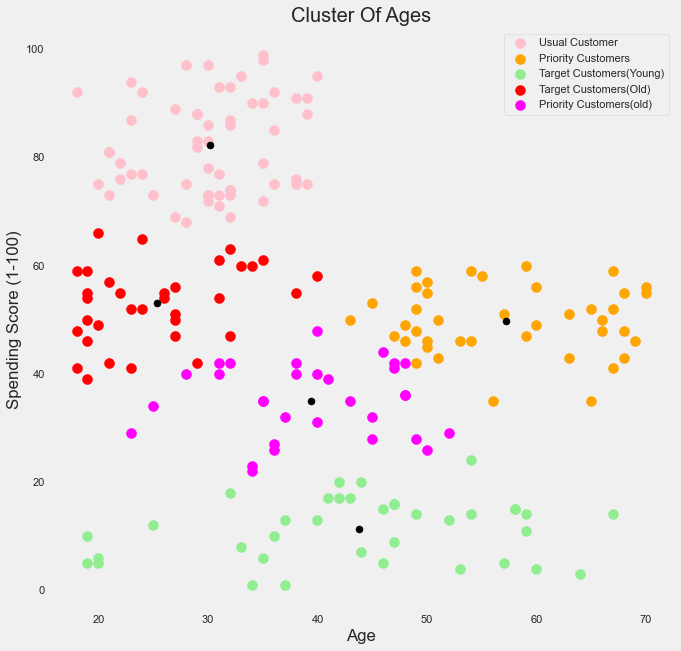

In [34]:
kmeans=KMeans(n_clusters=5,init='k-means++',max_iter=300,n_init=10,random_state=0)
ymeans=kmeans.fit_predict(x)


plt.rcParams['figure.figsize']=(10,10)
plt.title('Cluster Of Ages',fontsize=20)

plt.scatter(x[ymeans==0,0],x[ymeans==0,1],s=100,c='pink',label='Usual Customer')
plt.scatter(x[ymeans==1,0],x[ymeans==1,1],s=100,c='orange',label='Priority Customers')
plt.scatter(x[ymeans==2,0],x[ymeans==2,1],s=100,c='lightgreen',label='Target Customers(Young)')
plt.scatter(x[ymeans==3,0],x[ymeans==3,1],s=100,c='red',label='Target Customers(Old)')
plt.scatter(x[ymeans==4,0],x[ymeans==4,1],s=100,c='magenta',label='Priority Customers(old)')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'black')

plt.style.use('fivethirtyeight')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid()
plt.show()